<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week11/binary_classification_models_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout

# Sci-kit learn
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [40]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTZf6XIYPLjxmCS8BzzEot1DaW4ns7P2q1CVqnZ6qw9f-A3bkCPbXX3H9vOE2_zrGKSxy4ZMaTf7lt4/pub?output=csv'
df = pd.read_csv(url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
# Check for duplicates and missing values
print(df.duplicated().sum())
print(df.isna().sum().sum())

0
0


In [42]:
# Check the balance
df['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [43]:
# Set the target and features and split the data
X = df.drop(columns = 'diagnosis')
y = df['diagnosis'].replace({'B': 0, 'M': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [44]:
# Scale the data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [45]:
# Create the model architecture
input_dim = X_train_sc.shape[1]

model = Sequential()

model.add(Dense(10, input_dim = input_dim, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [46]:
# Compile the model with metrics
model.compile(loss = 'bce',
              optimizer = 'adam',
              metrics = ['accuracy',
                         metrics.Precision(),
                         metrics.Recall()])

In [47]:
# Train the model
history = model.fit(X_train_sc, y_train,
                    validation_data = (X_test_sc, y_test),
                    epochs = 30,
                    verbose = 0)

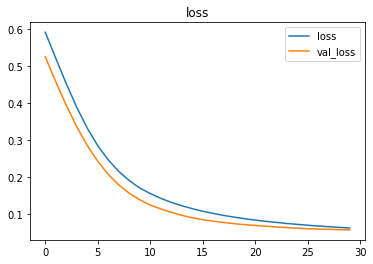

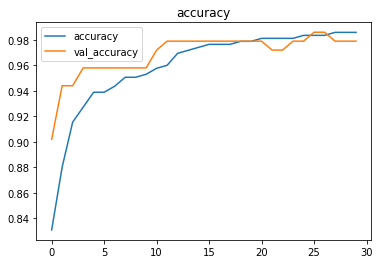

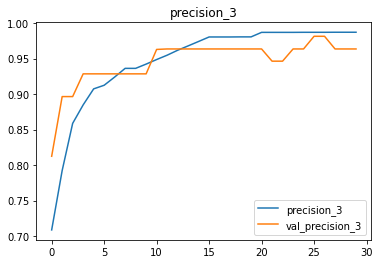

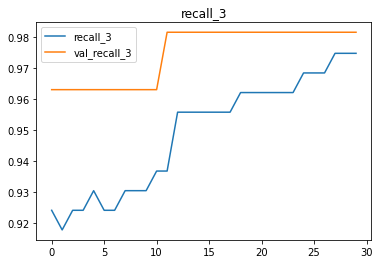

In [48]:
# Plot the learning history
plot_history(history)